In [95]:
import geopandas as gpd
import pandas as pd
import fiona
import shutil
import os
import random
from shapely.geometry import Point

fiona.drvsupport.supported_drivers[ "libkml" ] = "rw"
fiona.drvsupport.supported_drivers[ "LIBKML" ] = "rw"
fiona.supported_drivers

print(f"geopandas version {gpd.__version__}")
print(f"fiona version {fiona.__version__}")

print(pd.Timestamp.now())

geopandas version 0.14.0
fiona version 1.9.5
2023-11-11 17:30:01.159535


In [96]:
url = './datasets'


# df[['area', 'suit', 'geometry']], df[['area', 'suit', 'geometry']]
folders = os.listdir(url)

all_df = pd.DataFrame()
for folder in folders:
    path = f'{url}/{folder}'
    df = gpd.read_file(path)
    df = df.to_crs('EPSG:32647')
    column_0 = df.iloc[:, 0].name
    df = df[[f'{column_0}','area', 'suit', 'geometry']]
    df[column_0] = column_0
    df.rename(columns={f'{column_0}': 'type_plant'}, inplace=True)
    all_df = pd.concat([all_df, df], ignore_index=True)

all_df.head()

,type_plant,area,suit,geometry
0,FID_LU_man,18049.40,S1,"POLYGON ((713569.257 712473.228, 713550.302 71..."
1,FID_LU_man,4316.71,S1,"POLYGON ((714136.599 712833.908, 714194.605 71..."
2,FID_LU_man,42013.30,S1,"POLYGON ((714787.783 712851.687, 714810.033 71..."
3,FID_LU_man,15078.00,S2,"POLYGON ((714787.783 712851.687, 714785.044 71..."
4,FID_LU_man,160009.00,S1,"POLYGON ((716853.935 714078.285, 716856.748 71..."


In [97]:
all_df[all_df['type_plant'] == 'FID_LU_sug']

,type_plant,area,suit,geometry
5467,FID_LU_sug,1470.8400,S1,"POLYGON ((664392.354 766609.094, 664391.687 76..."
5468,FID_LU_sug,18.7737,S1,"POLYGON ((638531.607 787968.997, 638530.407 78..."
5469,FID_LU_sug,197.1900,S1,"POLYGON ((638449.747 788146.313, 638449.605 78..."
5470,FID_LU_sug,1055.5900,S2,"POLYGON ((664392.250 766634.725, 664392.564 76..."
5471,FID_LU_sug,3029.7100,S2,"POLYGON ((664392.250 766634.725, 664361.447 76..."
5472,FID_LU_sug,18986.9000,S2,"POLYGON ((638432.386 788172.960, 638436.237 78..."
5473,FID_LU_sug,3756.9800,S3,"POLYGON ((659583.346 784616.476, 659498.797 78..."


In [98]:
all_df.tail()

,type_plant,area,suit,geometry
24748,FID_LU_rub,74647.6,S3,"POLYGON ((682983.433 786421.528, 682942.818 78..."
24749,FID_LU_rub,18476.1,S2,"POLYGON ((678831.366 786575.862, 678818.353 78..."
24750,FID_LU_rub,3309530.0,S2,"POLYGON ((679997.720 786885.461, 680000.321 78..."
24751,FID_LU_rub,97989.2,S2,"POLYGON ((682757.856 787057.956, 682813.022 78..."
24752,FID_LU_rub,55125.3,S2,"POLYGON ((674566.078 787604.360, 674590.346 78..."


<Axes: >

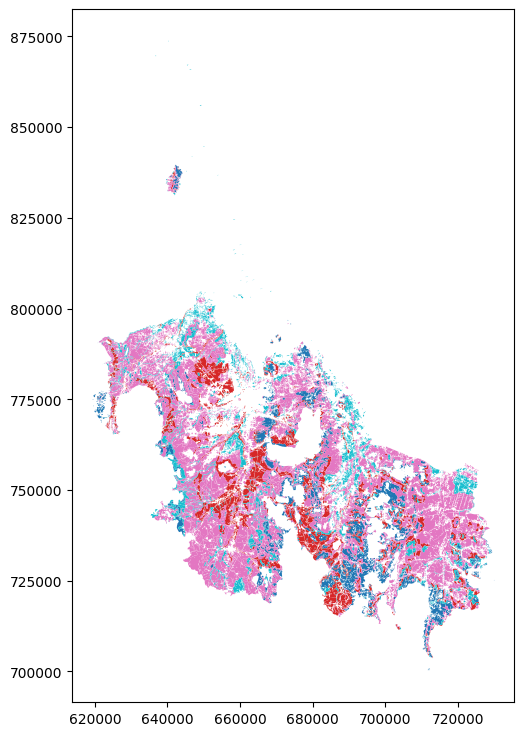

In [99]:
all_df[all_df['type_plant'] == 'FID_LU_rub'].plot(figsize=(16,9), column='suit')

<Axes: >

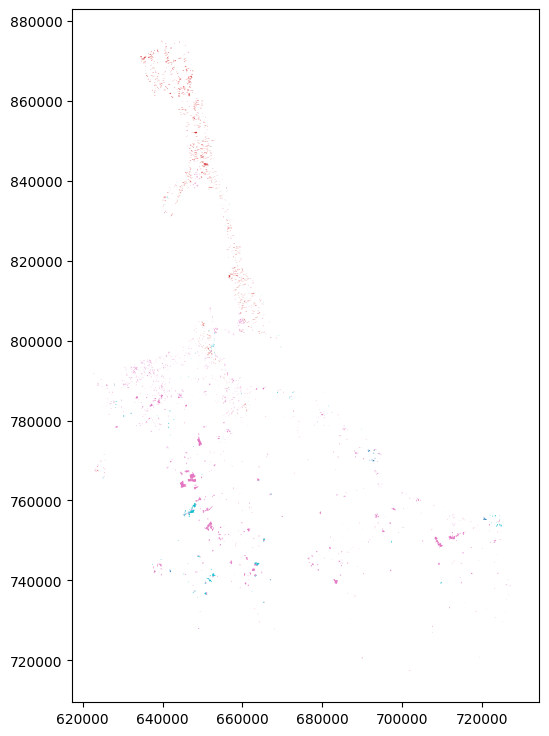

In [100]:
all_df[all_df['type_plant'] == 'FID_LU_pal'].plot(figsize=(16,9), column='suit')

In [101]:
all_columns = all_df['type_plant'].unique()
all_columns

array(['FID_LU_man', 'FID_LU_pal', 'FID_LU_sug', 'FID_LU_dur',
       'FID_LU_rub'], dtype=object)

In [109]:
points = [Point(100.487074, 7.024909)]
geo_df = gpd.GeoDataFrame(points, columns=['geometry'], crs='EPSG:4326')

geo_df = geo_df.to_crs('EPSG:32647')
list_points = list(geo_df['geometry'])
information_suit = []

for i in range(len(list_points)):
   
    utm_point = list_points[i]

    all_df['distance_to_point'] = all_df['geometry'].distance(utm_point)
    print(utm_point)
    points.append((utm_point.x, utm_point.y))
    for col in all_columns:
        col_df = all_df[all_df['type_plant'] == col]
        nearest_polygon = col_df[col_df['distance_to_point'] == col_df['distance_to_point'].min()]
        print(col, nearest_polygon['suit'].values[0], nearest_polygon['distance_to_point'].values[0] / 1000, 'km.')
        information_suit.append((col, nearest_polygon['suit'].values[0]))

    print("--------")


POINT (664258.137076538 776763.2120929033)
FID_LU_man S2 4.292892296880231 km.
FID_LU_pal S1 3.4976638002842217 km.
FID_LU_sug S3 9.139334119180495 km.
FID_LU_dur S1 10.111608664982743 km.
FID_LU_rub S2 0.8886178149458632 km.
--------


In [111]:
utm_x_list = []
utm_y_list = []

for i in range(len(list_points)):
    utm_x_list.append(list_points[i].x)
    utm_y_list.append(list_points[i].y)


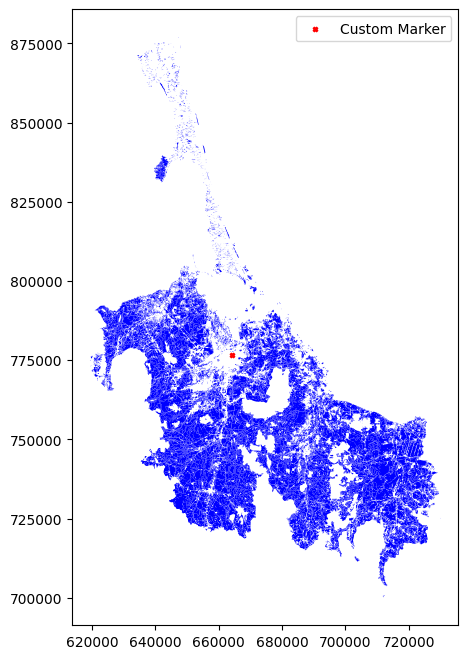

In [112]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8, 8))

# แสดงข้อมูลจาก GeoDataFrame บนแผนที่
all_df.plot(ax=ax, color='blue', markersize=50)

# สร้าง marker สำหรับจุดเพิ่มเติม (เช่นขนาด, สี, รูปร่าง, ศัพท์ของ marker) โดยใช้ matplotlib
plt.scatter(utm_x_list, utm_y_list, s=10, c='red', marker='X', label='Custom Marker')

# เพิ่มคำอธิบาย (legend)
plt.legend()

plt.show()

In [113]:
convert_title = {'FID_LU_man': 'มังคุด', 'FID_LU_pal': 'ปาล์มน้ำมัน', 'FID_LU_sug':'เงาะ' , 'FID_LU_dur':'ทุเรียน', 'FID_LU_rub': 'ยางพารา'}

In [120]:
dataset_result = {'area (km^2)': [], 'position': [], 
                           'มังคุด': [], 'ปาล์มน้ำมัน':[], 'เงาะ': [], 'ทุเรียน': [], 'ยางพารา': []
                           }

dataset_result['area (km^2)'].append(random.randint(1, 100))
dataset_result['position'].append(list_points[0])
for i in range(len(information_suit)):
    dataset_result[convert_title[information_suit[i][0]]].append(information_suit[i][1])
    
pd.DataFrame(dataset_result)

,area (km^2),position,มังคุด,ปาล์มน้ำมัน,เงาะ,ทุเรียน,ยางพารา
0,8,POINT (664258.137076538 776763.2120929033),S2,S1,S3,S1,S2
